<a href="https://colab.research.google.com/github/dalexa10/Python_Data_Science/blob/main/Simulations_Subatomic_Level/2022_4_5_DIGI_MAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install packages

The data package is the git link.

`ase` is a utility used to manipulate atomic structures and interface with calculation codes.

`nglview` allows us to visualize atomic structures in the notebook.

In [11]:
!pip install git+https://github.com/qmc-hamm/interlayer_energies_demo
!pip install ase
!pip install nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qmc-hamm/interlayer_energies_demo to /tmp/pip-req-build-8c_emxev
  Running command git clone --filter=blob:none --quiet https://github.com/qmc-hamm/interlayer_energies_demo /tmp/pip-req-build-8c_emxev
  Resolved https://github.com/qmc-hamm/interlayer_energies_demo to commit a0d6a8ab112fcaa136f10ade684339e206908fde
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import packages and set up notebook.

Most of these are pretty standard; `seaborn` and `matplotlib` for plotting and `numpy` for numerics.

On your own computer, you will not need to modify the widget manager, but for colab you need to do this for `nglview`.

In [12]:
import interlayer_energies_demo
import seaborn as sns
import matplotlib.pyplot as plt
import ase
import ase.visualize
import ase.build
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()


## Load data

The Python package containes the QMC data, which can be accessed as a `pandas` dataframe by calling `load_data()`

In [13]:
df = interlayer_energies_demo.load_data()
df

,disregistry,d,energy,energy_err
0,0.00000,3.00,-154.595604,0.000625
1,0.00000,3.20,-154.605262,0.002185
2,0.00000,3.35,-154.609349,0.000130
3,0.00000,3.50,-154.610323,0.000198
4,0.00000,3.65,-154.608002,0.000241
5,0.00000,3.80,-154.605785,0.000698
6,0.00000,4.00,-154.603948,0.000706
7,0.00000,4.50,-154.597326,0.000376
8,0.00000,5.00,-154.593713,0.000630
9,0.16667,3.00,-154.593673,0.000826


## Make some plots

Sliding energy

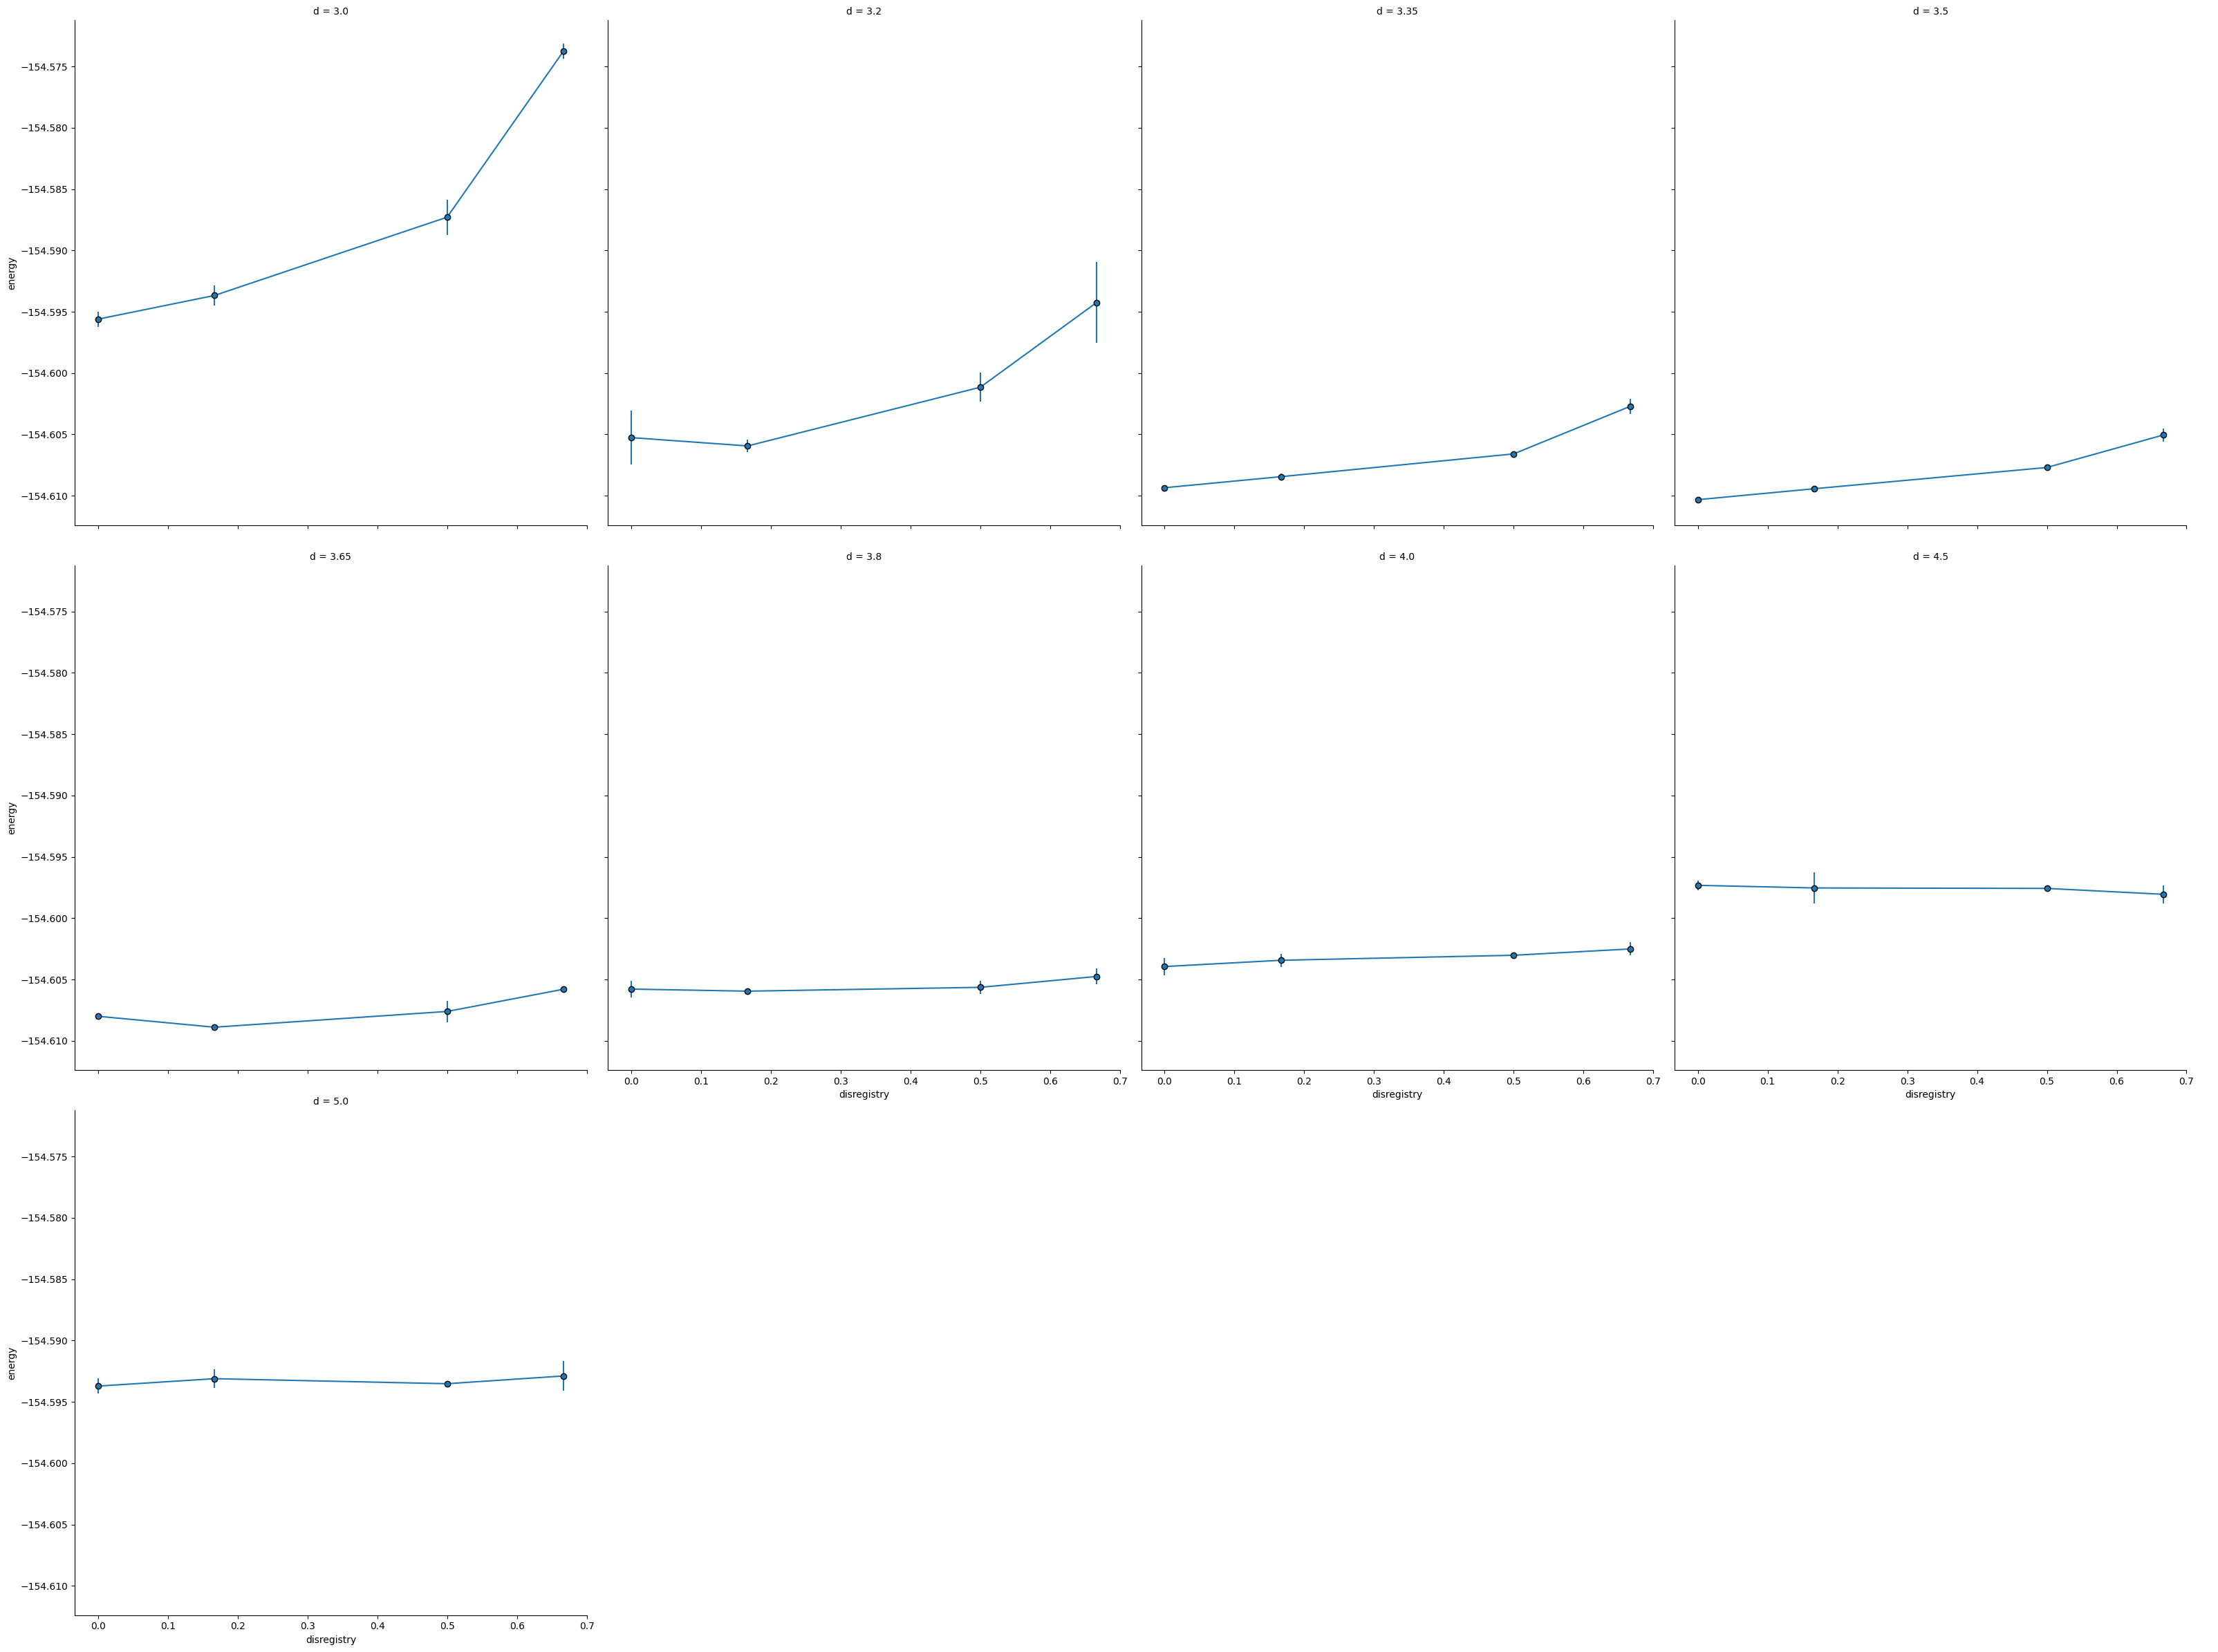

In [14]:
g = sns.FacetGrid(col='d', data =df, height=8, col_wrap=4)
g.map(plt.errorbar,'disregistry', 'energy', 'energy_err', marker='o', mew=1, mec='k')
g.add_legend()

An alternate view: binding for different alignments of the sheets.

Text(2429.9615764853397, 0.5, 'Energy (eV/atom)')

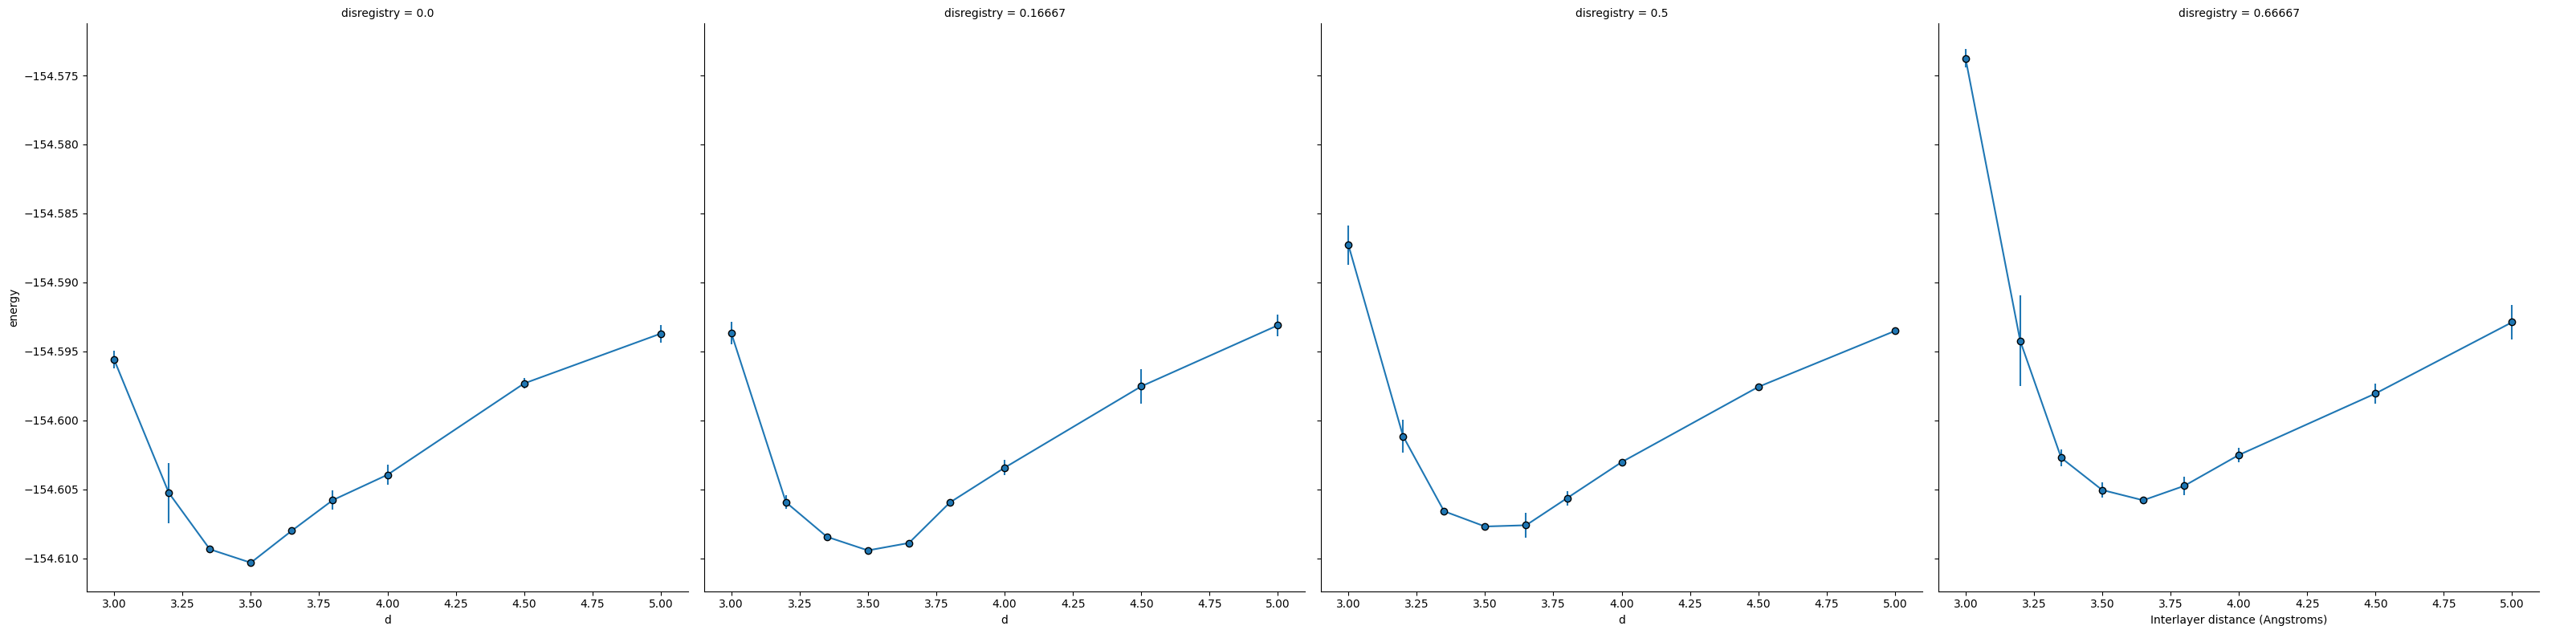

In [15]:
g = sns.FacetGrid(col='disregistry', data =df, height=8)
g.map(plt.errorbar,'d', 'energy', 'energy_err', marker='o', mew=1, mec='k')
g.add_legend()
plt.xlabel("Interlayer distance (Angstroms)")
plt.ylabel("Energy (eV/atom)")

## Create atoms objects

For a given distance and disregistry, you can create and visualize atoms objects. This allows us to exactly specify what configuration of atoms has what energy.

In [16]:
atoms = interlayer_energies_demo.create_graphene_geom(d=3.4, disregistry=0.)
atoms

Atoms(symbols='C4', pbc=True, cell=[[2.462, 0.0, 0.0], [1.231, 2.132154544117288, 0.0], [0.0, 0.0, 15.0]])

In [17]:
ase.visualize.view(ase.build.make_supercell(atoms, np.asarray([[2,0,0],[0,2,0],[0,0,1]])), viewer='ngl')

We can calculate the energy of the L-J potential on our atoms as follows:

In [18]:
import interlayer_energies_demo.lennard_jones as lj
import ase.calculators.lj
atoms.calc = ase.calculators.lj.LennardJones(sigma=3.5, epsilon=3e-2)
print("Energy is: ", atoms.get_potential_energy()/len(atoms))

Energy is:  8922.93254351046


The eval_energy() function just does this for all rows in our data frame.

In [19]:
import inspect
print(inspect.getsource(lj.eval_energy))

def eval_energy(df, sigma, epsilon):
    """ 
    """
    print(sigma, epsilon)
    energy = []
    for it, row in df.iterrows():
        atoms = generate_geometry.create_graphene_geom(row['d'], row['disregistry'])
        calc = ase.calculators.lj.LennardJones(sigma=sigma, epsilon=epsilon)
        atoms.calc=calc
        energy.append(atoms.get_potential_energy()/len(atoms))

    lj_en =  np.asarray(energy)- np.min(energy) + np.min(df['energy'])
    return lj_en



Discussion question: what is the purpose of the second-to-last line in `eval_energy`?

Try using the eval_energy() function to evaluate the energy of the geometries and compare to the QMC data.

Try varying the LJ parameters to see how close you can get to the QMC results.

3.5 0.03


Text(2482.070682864719, 0.5, 'Energy (eV/atom)')

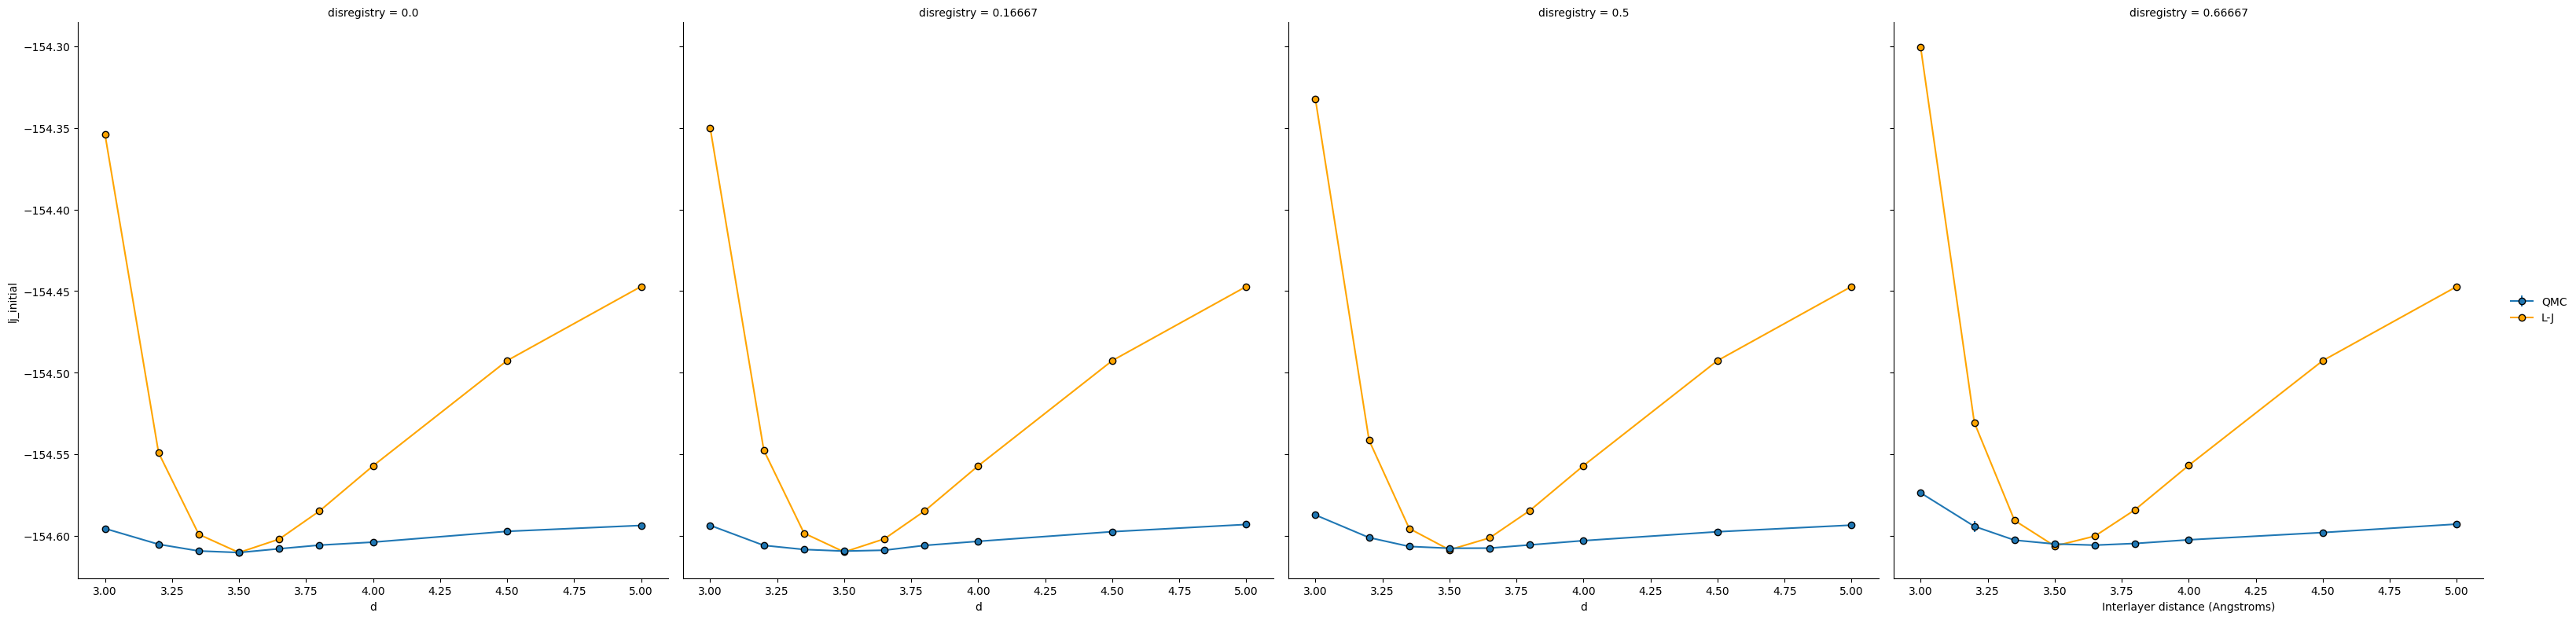

In [22]:
df['lj_initial'] = lj.eval_energy(df, sigma=3.5, epsilon=3e-2)
g = sns.FacetGrid(col='disregistry', data =df, height=8)
g.map(plt.errorbar,'d', 'energy', 'energy_err', marker='o', mew=1, mec='k', label='QMC')
g.map(plt.plot,'d', 'lj_initial', marker='o', mew=1, mec='k', color='orange', label='L-J')

g.add_legend()
plt.xlabel("Interlayer distance (Angstroms)")
plt.ylabel("Energy (eV/atom)")

What are the differences between LJ and QMC? 

## Fit Lennard-Jones parameters

Now that we have a general idea of what parameters to use, we can find the best fit parameters. We are using the scipy function `curve_fit` to do so. You can use `lj.fit_lj` to do it. 

In [23]:
sigma, epsilon = lj.fit_lj(df, sigma0=3.5, epsilon0=3e-3)

3.5 0.003
3.5 0.003
3.5 0.003
3.500000052154064 0.003
3.5 0.0030000000447034836
3.4667494547741184 0.0032185259117980037
3.466749506432711 0.0032185259117980037
3.4667494547741184 0.003218525959757777
3.466481726404221 0.003228786922107227
3.466481778058824 0.003228786922107227
3.466481726404221 0.0032287869702199014
3.46648484577555 0.003228733302660427
3.4664848974301994 0.003228733302660427
3.46648484577555 0.0032287333507723024
3.466486703229943 0.0032285956323166933
3.46648675488462 0.0032285956323166933
3.466486703229943 0.003228595680426517
3.4664916336396714 0.003228590925939415


Now that we have our optimal parameters, we can redo our plot. 

3.4664916336396714 0.003228590925939415


Text(2484.346721683078, 0.5, 'Energy (eV/atom)')

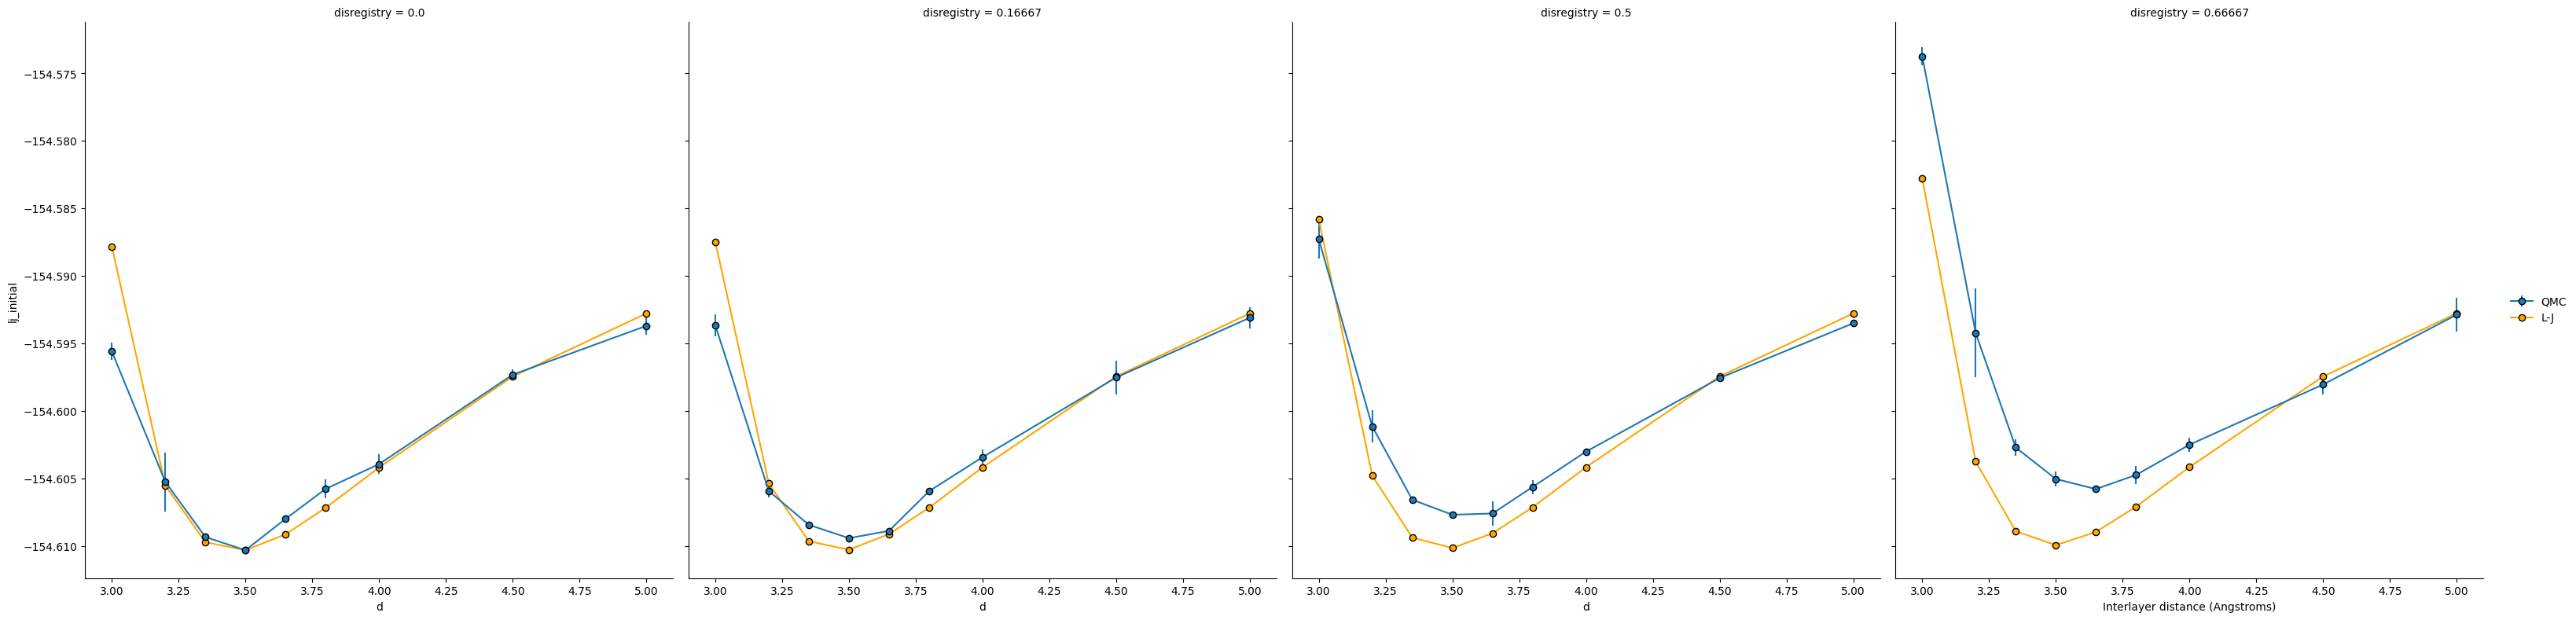

In [26]:
df['lj_opt'] = lj.eval_energy(df, sigma=3.4664916336396714, epsilon=0.003228590925939415)
g = sns.FacetGrid(col='disregistry', data =df, height=8)
g.map(plt.errorbar,'d', 'energy', 'energy_err', marker='o', mew=1, mec='k', label='QMC')
g.map(plt.plot,'d', 'lj_initial', marker='o', mew=1, mec='k', color='orange', label='L-J')

g.add_legend()
plt.xlabel("Interlayer distance (Angstroms)")
plt.ylabel("Energy (eV/atom)")

Now we'd like to characterize how good the fit is. There are multiple ways of doing this. Statistical variables: 

1. $R^2$: Coefficient of determination
2. RMS error. 
3. Physics: Sometimes the statistics look good but it misses an important physical effect. For example, would L-J describe the sliding energy similarly or differently from QMC?

Evaluate these quantities and discuss. Given this data, would you accept or reject a L-J model for this system?

In [29]:
from sklearn.metrics import r2_score
import numpy as np
r2 = r2_score(df['energy'], df['lj_opt'])
print('r2 score for the model is', r2)

rms = np.sqrt(np.mean((df['energy'] - df['lj_opt'])**2))
print('rms score for the model is', rms)

r2 score for the model is 0.8058072262191129
rms score for the model is 0.0033196867640721286


In [30]:
df.describe()

,disregistry,d,energy,energy_err,lj_initial,lj_opt
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.333335,3.777778,-154.601266,0.000648,-154.602347,-154.602347
std,0.267262,0.612308,0.007640,0.000642,0.008122,0.008122
min,0.000000,3.000000,-154.610323,0.000052,-154.610323,-154.610323
25%,0.125003,3.350000,-154.606113,0.000197,-154.609087,-154.609087
50%,0.333335,3.650000,-154.603692,0.000546,-154.605091,-154.605091
75%,0.541667,4.000000,-154.596895,0.000748,-154.597459,-154.597459
max,0.666670,5.000000,-154.573748,0.003282,-154.582787,-154.582787
